<a href="https://colab.research.google.com/github/fakhruddinarif/imgpro-compvis/blob/main/modul9/modul9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

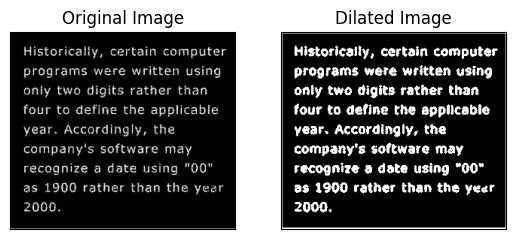

In [16]:
def dilate_manual(image, kernel):
    dilated_image = np.zeros_like(image)
    pad = kernel.shape[0] // 2
    padded_image = np.pad(image, pad, mode='constant')

    for i in range(pad, padded_image.shape[0] - pad):
        for j in range(pad, padded_image.shape[1] - pad):
            region = padded_image[i - pad:i + pad + 1, j - pad:j + pad + 1]
            if np.any(region[kernel == 1]):
                dilated_image[i - pad, j - pad] = 255
    return dilated_image

img = cv2.imread('/content/drive/MyDrive/imgpro_compvis/morphology.png')

_, img_binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)

dilated_img = dilate_manual(img_binary, kernel)

plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilated_img, cmap='gray')
plt.title('Dilated Image'), plt.xticks([]), plt.yticks([])
plt.show()

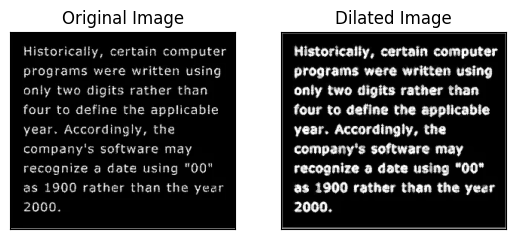

In [10]:
# Load the image
img = cv2.imread('/content/drive/MyDrive/imgpro_compvis/morphology.png', cv2.IMREAD_GRAYSCALE)

# Define the structuring element (cross 3x3)
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)

# Apply dilation
dilated_img = cv2.dilate(img, kernel, iterations=1)

# Display the original and dilated images
plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilated_img, cmap='gray')
plt.title('Dilated Image'), plt.xticks([]), plt.yticks([])
plt.show()


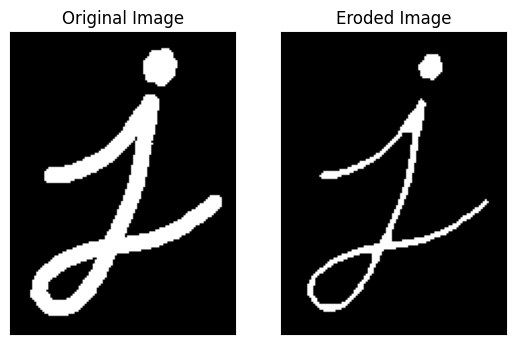

In [23]:
def erosion_manual(image, kernel):
    # Get dimensions of the image and kernel
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Create a padded version of the image
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_width), (pad_height, pad_width)), mode='constant', constant_values=0)

    # Create an empty image to store the result
    eroded_image = np.zeros_like(image)

    # Perform the erosion operation
    for i in range(pad_height, img_height + pad_height):
        for j in range(pad_width, img_width + pad_width):
            # Extract the region of interest
            region = padded_image[i - pad_height:i + pad_height + 1, j - pad_width:j + pad_width + 1]
            # Apply the erosion (minimum value in the region)
            eroded_image[i - pad_height, j - pad_width] = np.min(region * kernel)

    return eroded_image

img = cv2.imread('/content/drive/MyDrive/imgpro_compvis/j.png', cv2.IMREAD_GRAYSCALE)

kernel = np.ones((5, 5), dtype=np.uint8)

eroded_img = erosion_manual(img, kernel)

# Display the original and dilated images
plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(eroded_img, cmap='gray')
plt.title('Eroded Image'), plt.xticks([]), plt.yticks([])
plt.show()

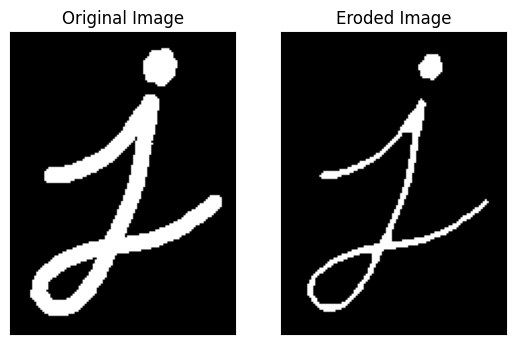

In [24]:
img = cv2.imread('/content/drive/MyDrive/imgpro_compvis/j.png', cv2.IMREAD_GRAYSCALE)

kernel = np.ones((5, 5), dtype=np.uint8)

eroded_img = cv2.erode(img, kernel, iterations=1)

# Display the original and dilated images
plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(eroded_img, cmap='gray')
plt.title('Eroded Image'), plt.xticks([]), plt.yticks([])
plt.show()

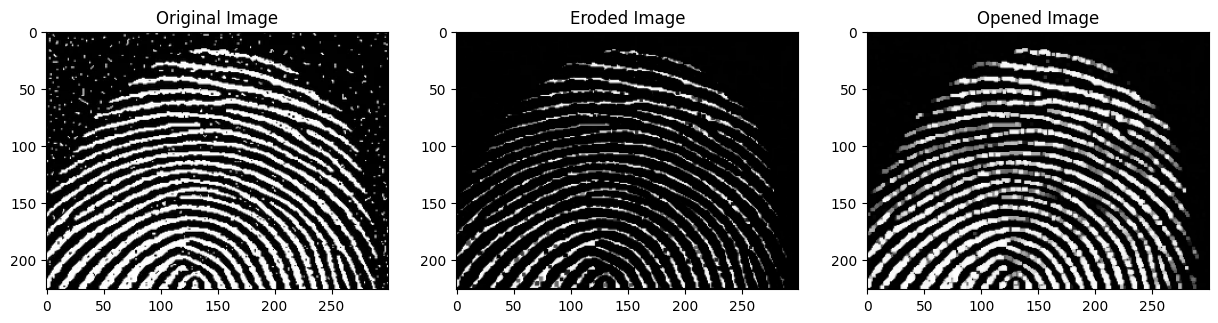

In [29]:
def erode_image(image, kernel):
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_width), (pad_height, pad_width)), mode='constant', constant_values=0)
    eroded_image = np.zeros_like(image)
    for i in range(pad_height, img_height + pad_height):
        for j in range(pad_width, img_width + pad_width):
            region = padded_image[i - pad_height:i + pad_height + 1, j - pad_width:j + pad_width + 1]
            eroded_image[i - pad_height, j - pad_width] = np.min(region * kernel)
    return eroded_image

def dilate_image(image, kernel):
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_width), (pad_height, pad_width)), mode='constant', constant_values=0)
    dilated_image = np.zeros_like(image)
    for i in range(pad_height, img_height + pad_height):
        for j in range(pad_width, img_width + pad_width):
            region = padded_image[i - pad_height:i + pad_height + 1, j - pad_width:j + pad_width + 1]
            dilated_image[i - pad_height, j - pad_width] = np.max(region * kernel)
    return dilated_image

# Load an example image
img = cv2.imread('/content/drive/MyDrive/imgpro_compvis/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Define a 3x3 square structuring element
kernel = np.ones((3, 3), dtype=np.uint8)

# Perform erosion followed by dilation (opening)
eroded_image = erode_image(img, kernel)
opened_image = dilate_image(eroded_image, kernel)

# Display the original and opened images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.subplot(1, 3, 2)
plt.title("Eroded Image")
plt.imshow(eroded_image, cmap='gray')
plt.subplot(1, 3, 3)
plt.title("Opened Image")
plt.imshow(opened_image, cmap='gray')
plt.show()

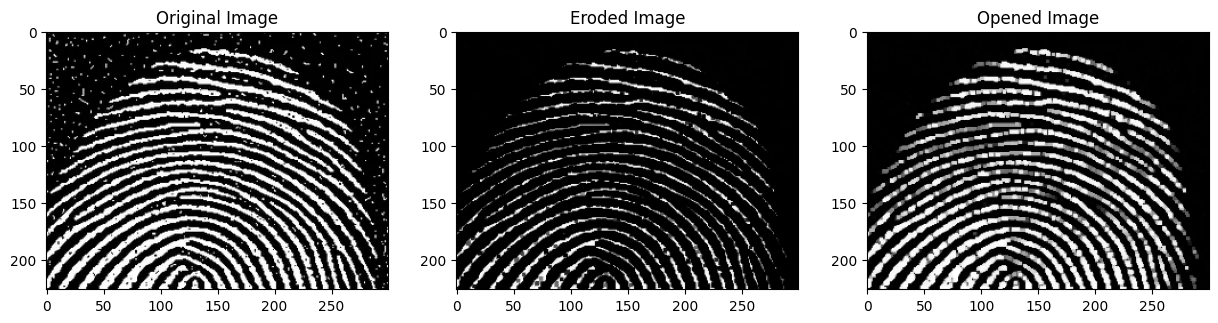

In [31]:
img = cv2.imread('/content/drive/MyDrive/imgpro_compvis/fingerprint.png', cv2.IMREAD_GRAYSCALE)

kernel = np.ones((3, 3), dtype=np.uint8)

eroded_image = cv2.erode(img, kernel, iterations=1)
opened_image = cv2.dilate(eroded_image, kernel, iterations=1)

# Display the original and opened images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.subplot(1, 3, 2)
plt.title("Eroded Image")
plt.imshow(eroded_image, cmap='gray')
plt.subplot(1, 3, 3)
plt.title("Opened Image")
plt.imshow(opened_image, cmap='gray')
plt.show()

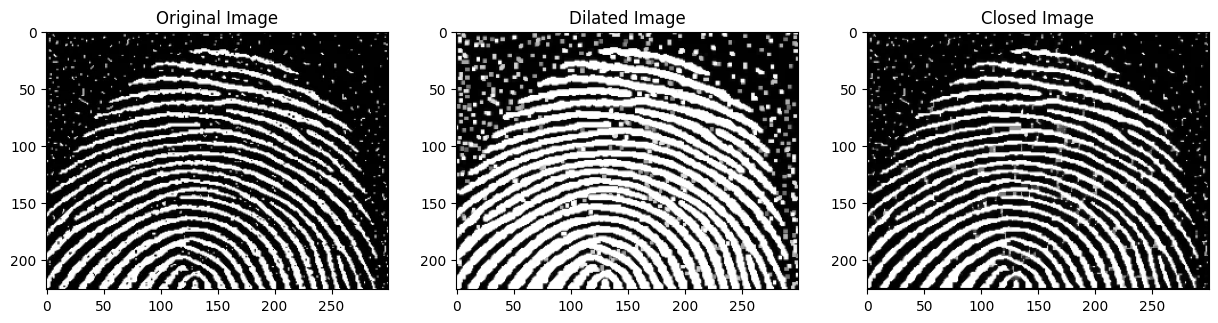

In [33]:
def erode_image(image, kernel):
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_width), (pad_height, pad_width)), mode='constant', constant_values=0)
    eroded_image = np.zeros_like(image)
    for i in range(pad_height, img_height + pad_height):
        for j in range(pad_width, img_width + pad_width):
            region = padded_image[i - pad_height:i + pad_height + 1, j - pad_width:j + pad_width + 1]
            eroded_image[i - pad_height, j - pad_width] = np.min(region * kernel)
    return eroded_image

def dilate_image(image, kernel):
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_width), (pad_height, pad_width)), mode='constant', constant_values=0)
    dilated_image = np.zeros_like(image)
    for i in range(pad_height, img_height + pad_height):
        for j in range(pad_width, img_width + pad_width):
            region = padded_image[i - pad_height:i + pad_height + 1, j - pad_width:j + pad_width + 1]
            dilated_image[i - pad_height, j - pad_width] = np.max(region * kernel)
    return dilated_image

# Load an example image
img = cv2.imread('/content/drive/MyDrive/imgpro_compvis/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Define a 3x3 square structuring element
kernel = np.ones((3, 3), dtype=np.uint8)

# Perform dilation followed by erosion (closing)
dilated_image = dilate_image(img, kernel)
closed_image = erode_image(dilated_image, kernel)

# Display the original and closed images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.subplot(1, 3, 2)
plt.title("Dilated Image")
plt.imshow(dilated_image, cmap='gray')
plt.subplot(1, 3, 3)
plt.title("Closed Image")
plt.imshow(closed_image, cmap='gray')
plt.show()

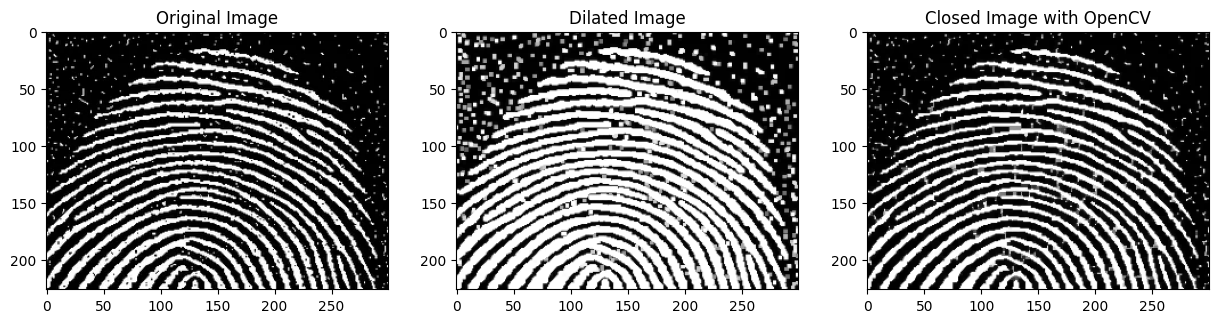

In [35]:
# Load an example image
img = cv2.imread('/content/drive/MyDrive/imgpro_compvis/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Define a 3x3 square structuring element
kernel = np.ones((3, 3), dtype=np.uint8)

# Perform closing using OpenCV
closed_image_cv = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

dilated_image = cv2.dilate(img, kernel)

# Display the original and closed images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.subplot(1, 3, 2)
plt.title("Dilated Image")
plt.imshow(dilated_image, cmap='gray')
plt.subplot(1, 3, 3)
plt.title("Closed Image with OpenCV")
plt.imshow(closed_image_cv, cmap='gray')
plt.show()